Probability reforms stay within 10.0B deficit limit: 0.0%


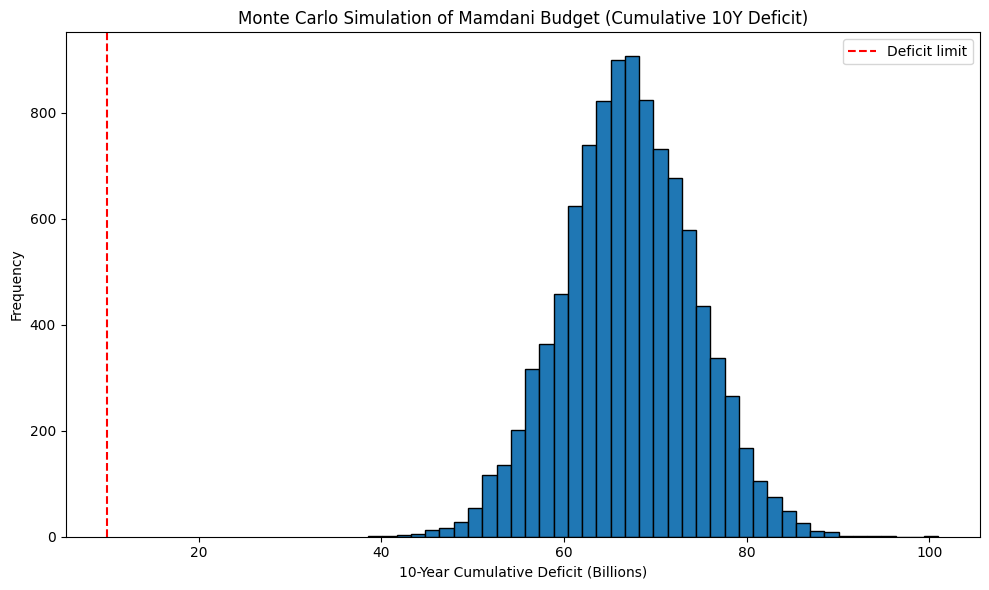

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_years = 10
n_sims  = 10_000

# fixed assumptions (tune these)
baseline_surplus = 2e9          # baseline surplus without reforms (per year)
base_extra_revenue = 10e9       # target from new taxes (per year)
childcare_mean, childcare_sd = 7e9, 1e9
buses_mean, buses_sd = 0.7e9, 0.1e9
housing_annual_mean, housing_annual_sd = 10e9, 2e9   # 100B over 10 years on average

# max cumulative reform deficit you're willing to tolerate over 10 years
max_cum_deficit_allowed = 10e9

def run_one_path():
    cum_deficit = 0.0
    
    for t in range(n_years):
        # tax base shock: some years stronger/weaker than expected
        growth_shock = np.random.normal(0, 0.015)      # +/- 1.5 percentage points

        # behavioural response: how much of reform revenue is lost
        leakage_rate = np.random.triangular(0.0, 0.10, 0.20)  # skewed towards 10%

        extra_revenue_t = base_extra_revenue * (1 + growth_shock) * (1 - leakage_rate)

        childcare_cost_t = max(0, np.random.normal(childcare_mean, childcare_sd))
        buses_cost_t     = max(0, np.random.normal(buses_mean, buses_sd))
        housing_cost_t   = max(0, np.random.normal(housing_annual_mean, housing_annual_sd))

        total_new_cost_t = childcare_cost_t + buses_cost_t + housing_cost_t

        net_balance_t = baseline_surplus + extra_revenue_t - total_new_cost_t
        if net_balance_t < 0:
            cum_deficit += -net_balance_t

    return cum_deficit   # return the number, not True/False

# run simulations
results = np.array([run_one_path() for _ in range(n_sims)])   # dollars
results_billion = results / 1e9                               # convert to billions

# probability that cumulative deficit stays within allowed limit
prob_feasible = (results <= max_cum_deficit_allowed).mean()
print(f"Probability reforms stay within {max_cum_deficit_allowed/1e9:.1f}B deficit limit: {prob_feasible:.1%}")

# plot histogram
plt.figure(figsize=(10, 6))
plt.hist(results_billion, bins=40, edgecolor='black')
plt.xlabel("10-Year Cumulative Deficit (Billions)")
plt.ylabel("Frequency")
plt.title("Monte Carlo Simulation of Mamdani Budget (Cumulative 10Y Deficit)")

# show deficit limit as a vertical line
plt.axvline(max_cum_deficit_allowed / 1e9,
            color='red', linestyle='--', label='Deficit limit')

plt.legend()
plt.tight_layout()
plt.show()
